<a href="https://colab.research.google.com/github/raiannysoares/analise_de_agradecimentos/blob/main/analise_agradecimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nuvem de agradecimentos** 

Recentemente, estava explorando as configurações de alguns aplicativos no meu celular e descobri algo muito interessante. Sempre fui uma pessoa positiva e tento enxergar o lado bom das situações, especialmente nos dias difíceis. Em 1º de julho de 2021, comecei a listar três coisas pelas quais sou grata todos os dias. Para isso, usei o aplicativo Presently e registrei minhas anotações diárias lá.

Enquanto explorava as configurações do aplicativo, descobri que era possível fazer o download de todas as minhas anotações. Agora, em março de 2023, tenho mais de 600 dias de gratidão registrados. Como uma pessoa curiosa, fiquei animada para analisar as coisas pelas quais mais agradeci durante esse período.

Para isso, decidi criar uma nuvem de palavras e identificar meus principais agradecimentos. Dividi minha análise em quatro partes: importações, tratamentos, nuvem de palavras e resultados.

# **1. Importação**

Para começar, importei todas as bibliotecas necessárias para a análise e carreguei os dados.

É importante ressaltar que não compartilharei os dados, pois os considero pessoais e relevantes apenas para mim.

In [8]:
#Pacotes utilizados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [9]:
#Carregando dados
dados = pd.read_csv('/content/PresentlyBackup2023-02-27T15-19-50.csv')
dados.columns = ['data', 'agradecimentos']

# **2. Tratamentos**

Para criar a nuvem de palavras, é necessário que o texto esteja em uma única variável string e não em linhas separadas. Além disso, é importante remover as conjunções, preposições, artigos e outras palavras que se repetem muito, mas que não têm informações relevantes.

In [10]:
# Juntar todas as palavras

# Variavel que irá juntar todas as palavras
agradecimentos = ''

# Loop na coluna Palavras
for Palavra in dados['agradecimentos']:
  # Concatenando todas as palavras com um "espaço"
  agradecimentos = agradecimentos + ' ' + Palavra

In [18]:
# lista de palavras para ser removidas
stopwords = set(STOPWORDS)
stopwords.update(["•","Por","\n","ter","pelo","pela","Pela","Pelo","de","Nathan","tá","coisas",
                  "em","coisa","feito","da","o","ficado","meu","minha","emprego","pra","e","não","na"])

# **3. Nuvem de palavras**

Como não queria que fosse possível visualizar muitos dos meus agradecimentos, decidi colocar as palavras em uma imagem de nuvem para que apenas as mais importantes aparecessem.

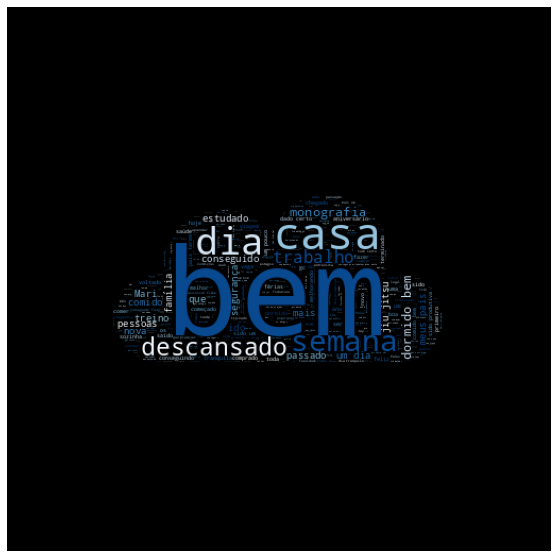

In [21]:
# endereço da imagem
img = np.array(Image.open("/content/nuvem.png"))
   
# configurar wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,colormap="Blues",
                      mask=img, max_font_size=200,
                      min_font_size=1).generate(agradecimentos)

# mostrar a imagem
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

# salvar no diretorio
wordcloud.to_file("nuvem_agradecimentos.png")

# **4. Resultados**

Percebe-se na imagem que a palavra "bem" é a mais destacada, o que indica que este foi o principal agradecimento durante o período analisado. Muitas coisas aconteceram durante esse tempo: iniciei e concluí meu estágio, terminei a faculdade,  perdi uma pessoa muito importante devido ao câncer, meu namoro de 6 anos passou a ser a distância, comecei a praticar jiu-jitsu, viajei pela primeira vez sozinha e ainda não consegui meu primeiro emprego na área de dados, entre outras coisas. 

A reflexão que tiro disso é que não importa o que aconteça, independente das dificuldades que possamos enfrentar, estar bem é o que nos dá forças para seguir em frente e buscar nossos objetivos.

Para finalizar, deixo a dica para que você explore seus aplicativos e verifique se não há ferramentas similares para download de dados que possam trazer informações interessantes para análises. 